In [363]:
import pandas as pd
import numpy as np
import requests,json, tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
%matplotlib inline

### 收集数据

In [2]:
image_predictions = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"

In [4]:
with open('image-predictions.tsv', 'wb') as f:
    f.write(requests.get(image_predictions).content)

In [2]:
consumer_key = '2GByMdAfZhc**************'
consumer_secret = '****************************OJINtVtEzOrCY7Q5g0NCNq'
access_token = '****************************dtTAhFHV3X4pYJpHFF9skK'
access_secret = '****************************azfYoSlWREio0gey5'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
tweet_ids = pd.read_csv('twitter-archive-enhanced.csv', usecols=[0])

In [5]:
tweet_list = tweet_ids.tweet_id.tolist()

In [6]:
f = open('tweet_json.txt', 'a')
for tweet_id in tweet_list:
    try:
        statu = api.get_status(tweet_id, tweet_mode='extended')
        json.dump(statu._json, f)
        f.write('\n')
    except:
        print()
f.close()
        

Rate limit reached. Sleeping for: 17


Rate limit reached. Sleeping for: 114


### 对项目数据进行评估

In [4]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
with open('tweet_json.txt') as f:
    lines = f.readlines()

In [7]:
tweet_json = pd.DataFrame(columns=('id', 'retweet_count', 'favorite_count'))

In [8]:
for line in lines:
    df = pd.io.json.json_normalize(json.loads(line))
    tweet_json = pd.concat([tweet_json, df], join='inner')

In [9]:
pd.options.display.max_columns=200
pd.options.display.max_colwidth=200

In [10]:
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
twitter_archive_enhanced.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [12]:
tweet_json.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8287,37950
0,892177421306343426,6119,32593
0,891815181378084864,4054,24539
0,891689557279858688,8416,41293
0,891327558926688256,9129,39484
0,891087950875897856,3035,19839
0,890971913173991426,2010,11599
0,890729181411237888,18383,64028
0,890609185150312448,4175,27249
0,890240255349198849,7190,31269


In [13]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# in_reply_to_status_id ,in_reply_to_user_id,retweeted等总数太小，可以删除
# timestamp列不是date数据类型
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# 把列名id改为tweet_id
# id列改为int类型
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338 entries, 0 to 0
Data columns (total 3 columns):
id                2338 non-null object
retweet_count     2338 non-null object
favorite_count    2338 non-null object
dtypes: object(3)
memory usage: 73.1+ KB


In [16]:
# 狗的名字不应该是a，或者the
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Tucker         10
Penny          10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Bailey          7
Buddy           7
an              7
Toby            7
Daisy           7
Scout           6
Bella           6
Jack            6
Koda            6
Milo            6
Stanley         6
Jax             6
Oscar           6
Leo             6
Rusty           6
Dave            6
Sammy           5
             ... 
Dot             1
Snoop           1
Rontu           1
Jonah           1
Blakely         1
Amber           1
Chesterson      1
old             1
Gunner          1
Tupawc          1
Kloey           1
Remus           1
Tess            1
Mauve           1
Lugan           1
Tayzie          1
Cilantro        1
Zeek            1
Thor            1
Chuq            1
Marq            1
Leonard         1
Gòrdón          1
Mollie          1
Jomathan  

In [17]:
# 狗的地位信息有大量缺失
twitter_archive_enhanced.iloc[:,13:]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


In [18]:
# source列有过多无用html代码
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
# 评分的分母有时是10，有时不是，把它们统一成10
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [39]:
# 有59张照片链接缺失
sum(twitter_archive_enhanced.expanded_urls.isnull())

59

In [19]:
# 有66张照片地址重复，可以删除
sum(image_prediction.jpg_url.duplicated())

66

In [22]:
twitter_archive_enhanced.in_reply_to_status_id[148].astype('int64')

863425645568774144

#### 质量问题

`twitter_archive_enhanced`

- 把所有的None替换为空值NaN
- 评分的分母有时是10，有时不是，分子实际上有小数的情况，需要重新抓取
- 狗的名字不应该是a,an,the
- 狗的地位信息有大量缺失
- source列有过多无用html代码
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp总数太小，可以删除
- timestamp列不是date数据类型
- 有59张照片链接缺失

`image_prediction`

- 有66张照片地址重复，可以删除

`tweet_json`

- id列改为int类型

#### 整洁度问题

- 狗狗的地位不需要用四列(doggo,floofer,pupper,puppo)来表示,可以整合为一列
- `image_prediction`和`tweet_json`两表可以合并到`twitter_archive_enhanced`

### 清理数据

#### 质量问题

In [231]:
image_clean = image_prediction.copy()
twitter_clean = twitter_archive_enhanced.copy()
tweet_clean = tweet_json.copy()

*先替换表中所有None为NaN*

In [232]:
 twitter_clean.replace('None', np.nan, inplace=True)

*有59张照片链接缺失*

In [233]:
twitter_clean[twitter_clean.expanded_urls.isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,NaN,NaN,NaN,NaN,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,NaN,NaN,NaN,NaN,NaN
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,NaN,NaN,NaN,NaN,NaN


*狗的地位信息有大量缺失*

In [234]:
twitter_clean = twitter_clean[twitter_clean.expanded_urls.isnull() == False]

In [235]:
twitter_clean[['doggo','floofer','pupper','puppo']].notnull().sum()

doggo       94
floofer     10
pupper     255
puppo       29
dtype: int64

In [236]:
stage = twitter_clean[['tweet_id','doggo','floofer','pupper','puppo']]

In [237]:
# 在后面整洁度问题一起解决
# twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

*狗的名字不应该是a,an,the*

In [238]:
twitter_clean.name.replace('the', np.nan, inplace=True)
twitter_clean.name.replace('a', np.nan, inplace=True)
twitter_clean.name.replace('an', np.nan, inplace=True)

*source列有过多无用html代码*

In [239]:
twitter_clean.source = twitter_clean.source.str.extract('>(.+)<',expand = True)

In [240]:
twitter_clean.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

*in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp总数太小，可以删除*

In [241]:
twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

*timestamp列不是date数据类型*

In [242]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

In [243]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  1541 non-null object
doggo                 94 non-null object
floofer               10 non-null object
pupper                255 non-null object
puppo                 29 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 233.3+ KB


*评分的分母有时是10，有时不是，分子实际上有小数的情况，需要重新抓取*

In [244]:
rating = twitter_clean.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)')

In [245]:
rating.columns = ['numerator', 'denominator']

In [246]:
twitter_clean.rating_numerator = twitter_clean.rating_numerator.astype('float');
twitter_clean.rating_numerator, twitter_clean.rating_denominator = rating.numerator.astype('float'), rating.denominator.astype('float')
twitter_clean.rating_numerator = twitter_clean.rating_numerator/twitter_clean.rating_denominator*10
twitter_clean.rating_denominator = 10

In [247]:
# 删除异常分数1776和420
twitter_clean.drop([979,2074],inplace=True)

In [248]:
twitter_clean.rating_numerator.value_counts()

12.00    551
11.00    461
10.00    458
13.00    339
9.00     156
8.00     102
14.00     52
7.00      52
5.00      34
6.00      32
3.00      19
4.00      15
2.00      10
1.00       5
9.75       2
0.00       2
15.00      1
13.50      1
11.27      1
11.26      1
Name: rating_numerator, dtype: int64

*有66张照片地址重复，可以删除*

In [249]:
image_prediction.jpg_url.drop_duplicates(inplace=True)

*id列改为int类型*

In [277]:
tweet_clean.id = tweet_clean.id.astype('int64')

#### 整洁度问题

*狗狗的地位不需要用四列(doggo,floofer,pupper,puppo)来表示,可以整合为一列*

In [258]:
twitter_clean['stage'] = twitter_clean.text.str.findall('doggo|floof|pupper|puppo')

In [260]:
twitter_clean['stage'] = twitter_clean['stage'].apply(lambda x: ','.join(set(x)))

In [262]:
twitter_clean.replace('', np.nan, inplace=True)

In [264]:
twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

`image_prediction`和`tweet_json`两表可以合并到`twitter_archive_enhanced`

In [273]:
twitter_archive_master = pd.merge(twitter_clean, image_clean, on='tweet_id', how='inner')

In [278]:
twitter_archive_master = pd.merge(twitter_archive_master, tweet_clean, left_on='tweet_id', right_on='id', how='inner')

In [290]:
twitter_archive_master.favorite_count = twitter_archive_master.favorite_count.astype('int64')
twitter_archive_master.retweet_count = twitter_archive_master.retweet_count.astype('int64')

In [291]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 23 columns):
tweet_id              2064 non-null int64
timestamp             2064 non-null datetime64[ns]
source                2064 non-null object
text                  2064 non-null object
expanded_urls         2064 non-null object
rating_numerator      2063 non-null float64
rating_denominator    2064 non-null int64
name                  1421 non-null object
stage                 357 non-null object
jpg_url               2064 non-null object
img_num               2064 non-null int64
p1                    2064 non-null object
p1_conf               2064 non-null float64
p1_dog                2064 non-null bool
p2                    2064 non-null object
p2_conf               2064 non-null float64
p2_dog                2064 non-null bool
p3                    2064 non-null object
p3_conf               2064 non-null float64
p3_dog                2064 non-null bool
id                    2064 non-

In [292]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

### 提出问题

- 评分高低和点赞数的关系
- 评分高低和转发数的关系
- 地位不同跟人们喜欢程度的关系
- 点赞超过平均数的狗中，什么品类的狗狗最多

### 见解

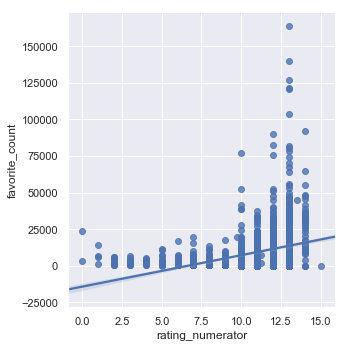

In [359]:
sns.set(style="darkgrid")
sns.lmplot(x='rating_numerator', y='favorite_count',data = twitter_archive_master)
plt.show();

点赞和评分呈现正相关性

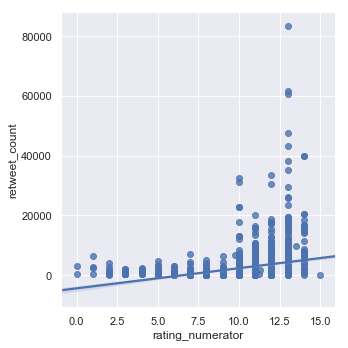

In [360]:
sns.set(style="darkgrid")
sns.lmplot(x='rating_numerator', y='retweet_count',data = twitter_archive_master)
plt.show();

转发和评分呈正相关性

In [348]:
stage_favorite = twitter_archive_master.groupby(['stage']).mean().favorite_count

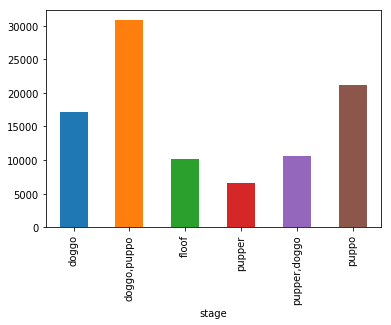

In [352]:
stage_favorite.plot(kind='bar');

人们最喜欢doggo与puppo地位的狗，最不受欢迎的是pupper地位的狗

### 可视化

In [376]:
fav_mean = twitter_archive_master.favorite_count.mean()
variety = twitter_archive_master[twitter_archive_master.favorite_count >= fav_mean]
data = variety.groupby(['p1']).count()

In [387]:
data = data.tweet_id.sort_values(ascending=False)

In [391]:
variety_dict = data.to_dict()

In [386]:
dog_image = np.array(Image.open('dog_white.jpg'))

In [408]:
wc = WordCloud(background_color="white", max_words=200, mask=dog_image)

In [415]:
wc.generate_from_frequencies(variety_dict);

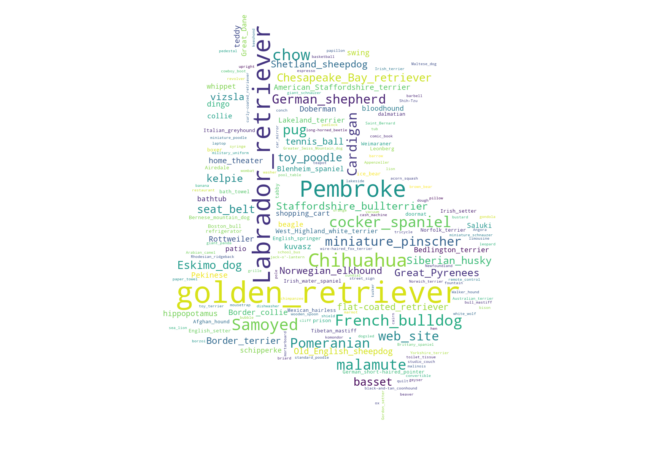

In [416]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = (30.0, 8.0)
plt.show()

In [417]:
data.head()

p1
golden_retriever      66
Labrador_retriever    40
Pembroke              35
Chihuahua             23
Samoyed               16
Name: tweet_id, dtype: int64

人们最喜欢且最常看到的狗狗种类是golden_retriever